In [26]:
import numpy as np
from numpy import linalg as LA
import cv2
# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [27]:
def CMatrix(N):
    C = np.zeros(shape=(N,N))
    for n in range(N):
        for k in range(N):
            if n == 0:
                c_n = np.sqrt(1/N)
            else:
                c_n = np.sqrt(2/N)
            C[n][k] = c_n * np.cos((2*k+1)*n*np.pi/(2*N))
    return C
    
C = CMatrix(N=4)

In [28]:
np.max(abs(LA.inv(C)-C.T))
# Hier wird gezeigt, dass inv(C) == C'

3.3306690738754696e-16

In [29]:
x = np.array([1, 1, 1, 1])
y = np.dot(C, x.T)
print(y)

[ 2.00000000e+00  5.55111512e-17  0.00000000e+00 -1.11022302e-16]


# 2D DCT
### Falls Bild m*n Matrix

In [30]:
def dct2d(X):
    CL = CMatrix(X.shape[0]) # m
    CR = CMatrix(X.shape[1]) # n
    Y = np.dot(np.dot(CL, X), CR.T)
    return Y

def idct2d(Y):
    CL = CMatrix(Y.shape[0]) # m
    CR = CMatrix(Y.shape[1]) # n
    X = np.dot(np.dot(CL.T, Y), CR)
    return X
    
def compress(Y, thresh):
    Y[abs(Y) < thresh] = 0
    return Y

(<matplotlib.image.AxesImage at 0x12703b438>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 Text(0.5, 1.0, 'Y5'))

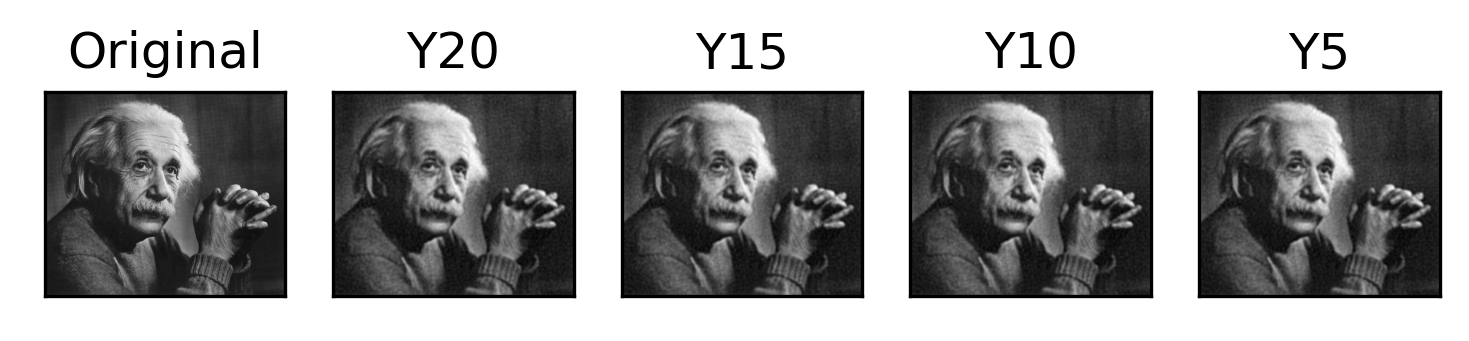

In [32]:
img = cv2.imread("EinsteinLowContrast.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Y = dct2d(img)
Y20 = compress(Y, 20)
Y15 = compress(Y, 15)
Y10 = compress(Y, 10)
Y5 = compress(Y, 5)
img_compressed20 = idct2d(Y20)
img_compressed15 = idct2d(Y15)
img_compressed10 = idct2d(Y10)
img_compressed5 = idct2d(Y5)

plt.subplot(1, 5, 1)
plt.imshow(img, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Original")
plt.subplot(1, 5, 2)
plt.imshow(img_compressed20, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Y20")
plt.subplot(1, 5, 3)
plt.imshow(img_compressed15, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Y15")
plt.subplot(1, 5, 4)
plt.imshow(img_compressed10, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Y10")
plt.subplot(1, 5, 5)
plt.imshow(img_compressed5, cmap="gray"), plt.yticks([]), plt.xticks([]), plt.title("Y5")